## Importing neccessary modules HR data

In [1]:
import pandas as pd
import numpy as np
from numpy.random import default_rng
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, accuracy_score,confusion_matrix
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
hr=pd.read_csv(r"K:\Desktop\NIIT\Challenge\Course_9\DS2_C5_S4_HR_Data_Challenge.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## Impact of salary on employee retention

<AxesSubplot: xlabel='left'>

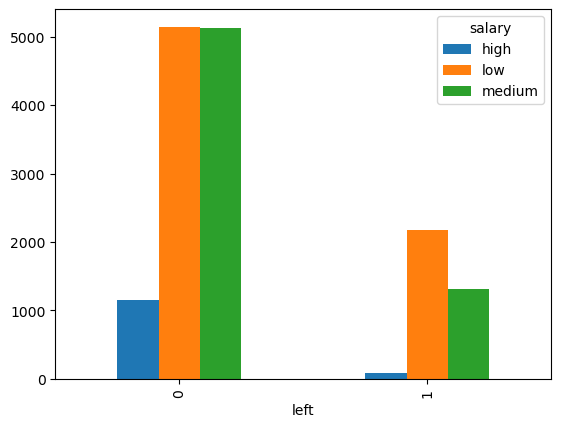

In [4]:
pd.crosstab(hr["left"],hr["salary"]).plot(kind="bar")

## Department wise retention

<AxesSubplot: xlabel='left'>

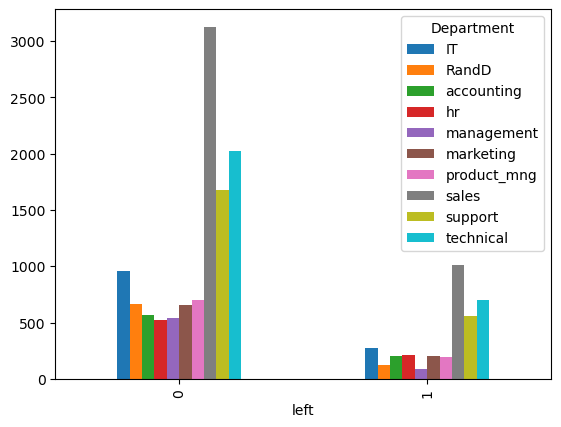

In [5]:
pd.crosstab(hr["left"],hr["Department"]).plot(kind="bar")

## Missing value imputations 

In [6]:
hr.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [7]:
import seaborn as sns
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


## Splitting and labelencoding

In [8]:
labeler=LabelEncoder()
hr1=hr.copy()
hr1.salary=labeler.fit_transform(hr.salary)
hr1.Department=labeler.fit_transform(hr.Department)

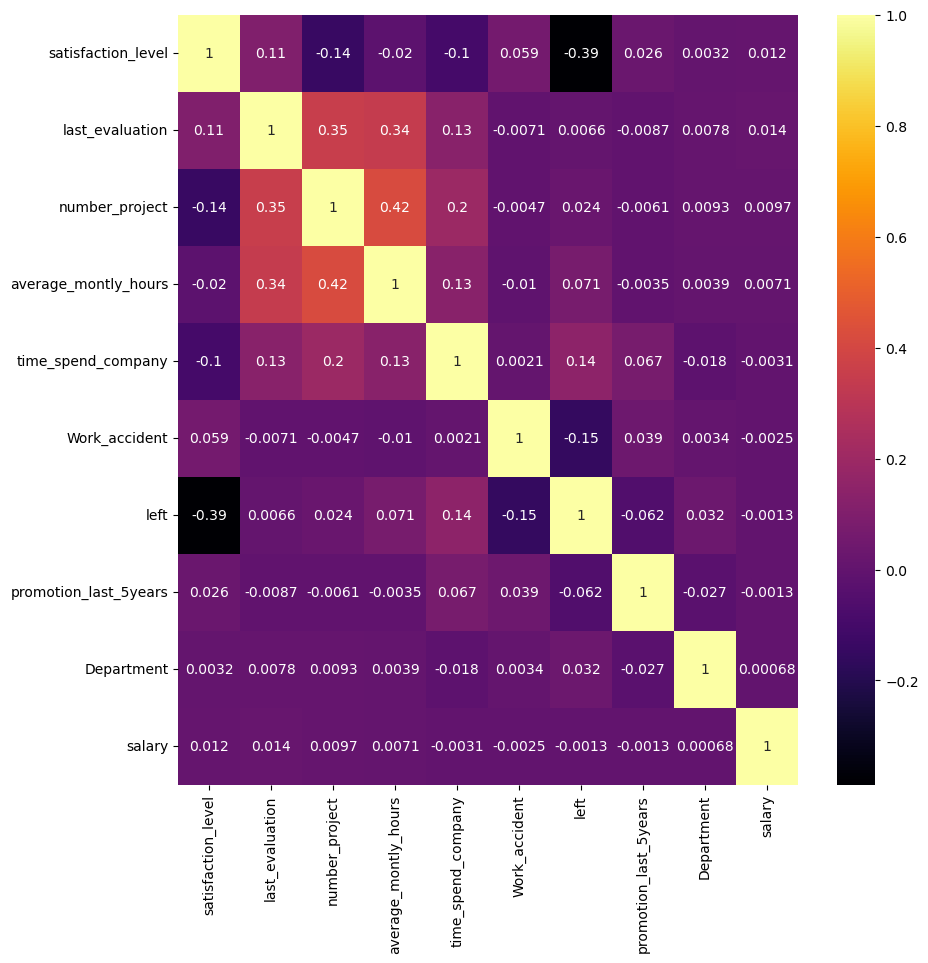

In [25]:
sns.heatmap(hr1.corr(),annot=True,cmap="inferno")
plt.rcParams["figure.figsize"] = (10,10)

### Dropping last evaluation column since it has the least influence

In [10]:
df_train, df_test = train_test_split(hr1,train_size = 0.8,random_state=298)

In [11]:
xtrain=df_train.drop(columns=["left","last_evaluation"],axis=1)
xtest=df_test.drop(columns=["left","last_evaluation"],axis=1)
ytrain=df_train["left"]
ytest=df_test["left"]

## Modelling

In [12]:
classifier=GaussianNB()
classifier.fit(xtrain,ytrain)
ypred1=classifier.predict(xtest)

### Accuracy on training data and test data

In [13]:
print("Accuracy of model in training data : ",round(classifier.score(xtrain,ytrain)*100,2),"%")
print("Accuracy of model in test data : ",accuracy_score(ypred1,ytest)*100,"%")

Accuracy of model in training data :  79.4 %
Accuracy of model in test data :  81.66666666666667 %


## Conclusion : 
The Naive Bayes model has an accuracy of 79.68% on the training data and 81.6% on the test data. This indicates that the model generalizes well to unseen data. The model has a good performance with an accuracy of approximately 80%. Other metrics and context should be considered for a complete evaluation.

## DecisionTreeClassifier

In [14]:
from sklearn.tree import DecisionTreeClassifier

### Model creation

In [15]:
classifier2 = DecisionTreeClassifier(max_depth=4)
clf = classifier2.fit(xtrain,ytrain)
ypred2 = clf.predict(xtest)

## Model evaluation

In [16]:
print("model accuracy on train data = ",classifier2.score(xtrain,ytrain)*100,"%")

model accuracy on train data =  96.48304025335445 %


In [17]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp =confusion_matrix(ytest,ypred2).ravel()

#### 2256 instances were correctly classified as class 0.
#### 633 instances were correctly classified as class 1.
#### 54 instances were misclassified as class 0, but their actual class was 1.
#### 57 instances were misclassified as class 1, but their actual class was 0.

In [18]:
# Evaluate other metrics
from sklearn.metrics import recall_score,f1_score,accuracy_score,precision_score 
print('accuracy:', accuracy_score(ytest, ypred2)*100,"%")
print('recall:', recall_score(ytest, ypred2, average='weighted')*100,"%")
print('f1-score:', f1_score(ytest, ypred2, average='weighted')*100,"%")
print('precision:', precision_score(ytest, ypred2,average="weighted")*100,"%")

accuracy: 96.3 %
recall: 96.3 %
f1-score: 96.29717001805408 %
precision: 96.29460407002759 %


## Conclusion: 
The Decision Tree model has high accuracy, recall, f1-score, and precision, with values of 96.3%, 96.3%, 96.297%, and 96.294% respectively. This indicates that the model is making accurate predictions with good balance between precision and recall. The high scores suggest that the model is performing well in classifying the data.

### Decision tree

In [19]:
features=xtrain.columns

Text(0.5, 1.0, 'Decision Tree of hr data')

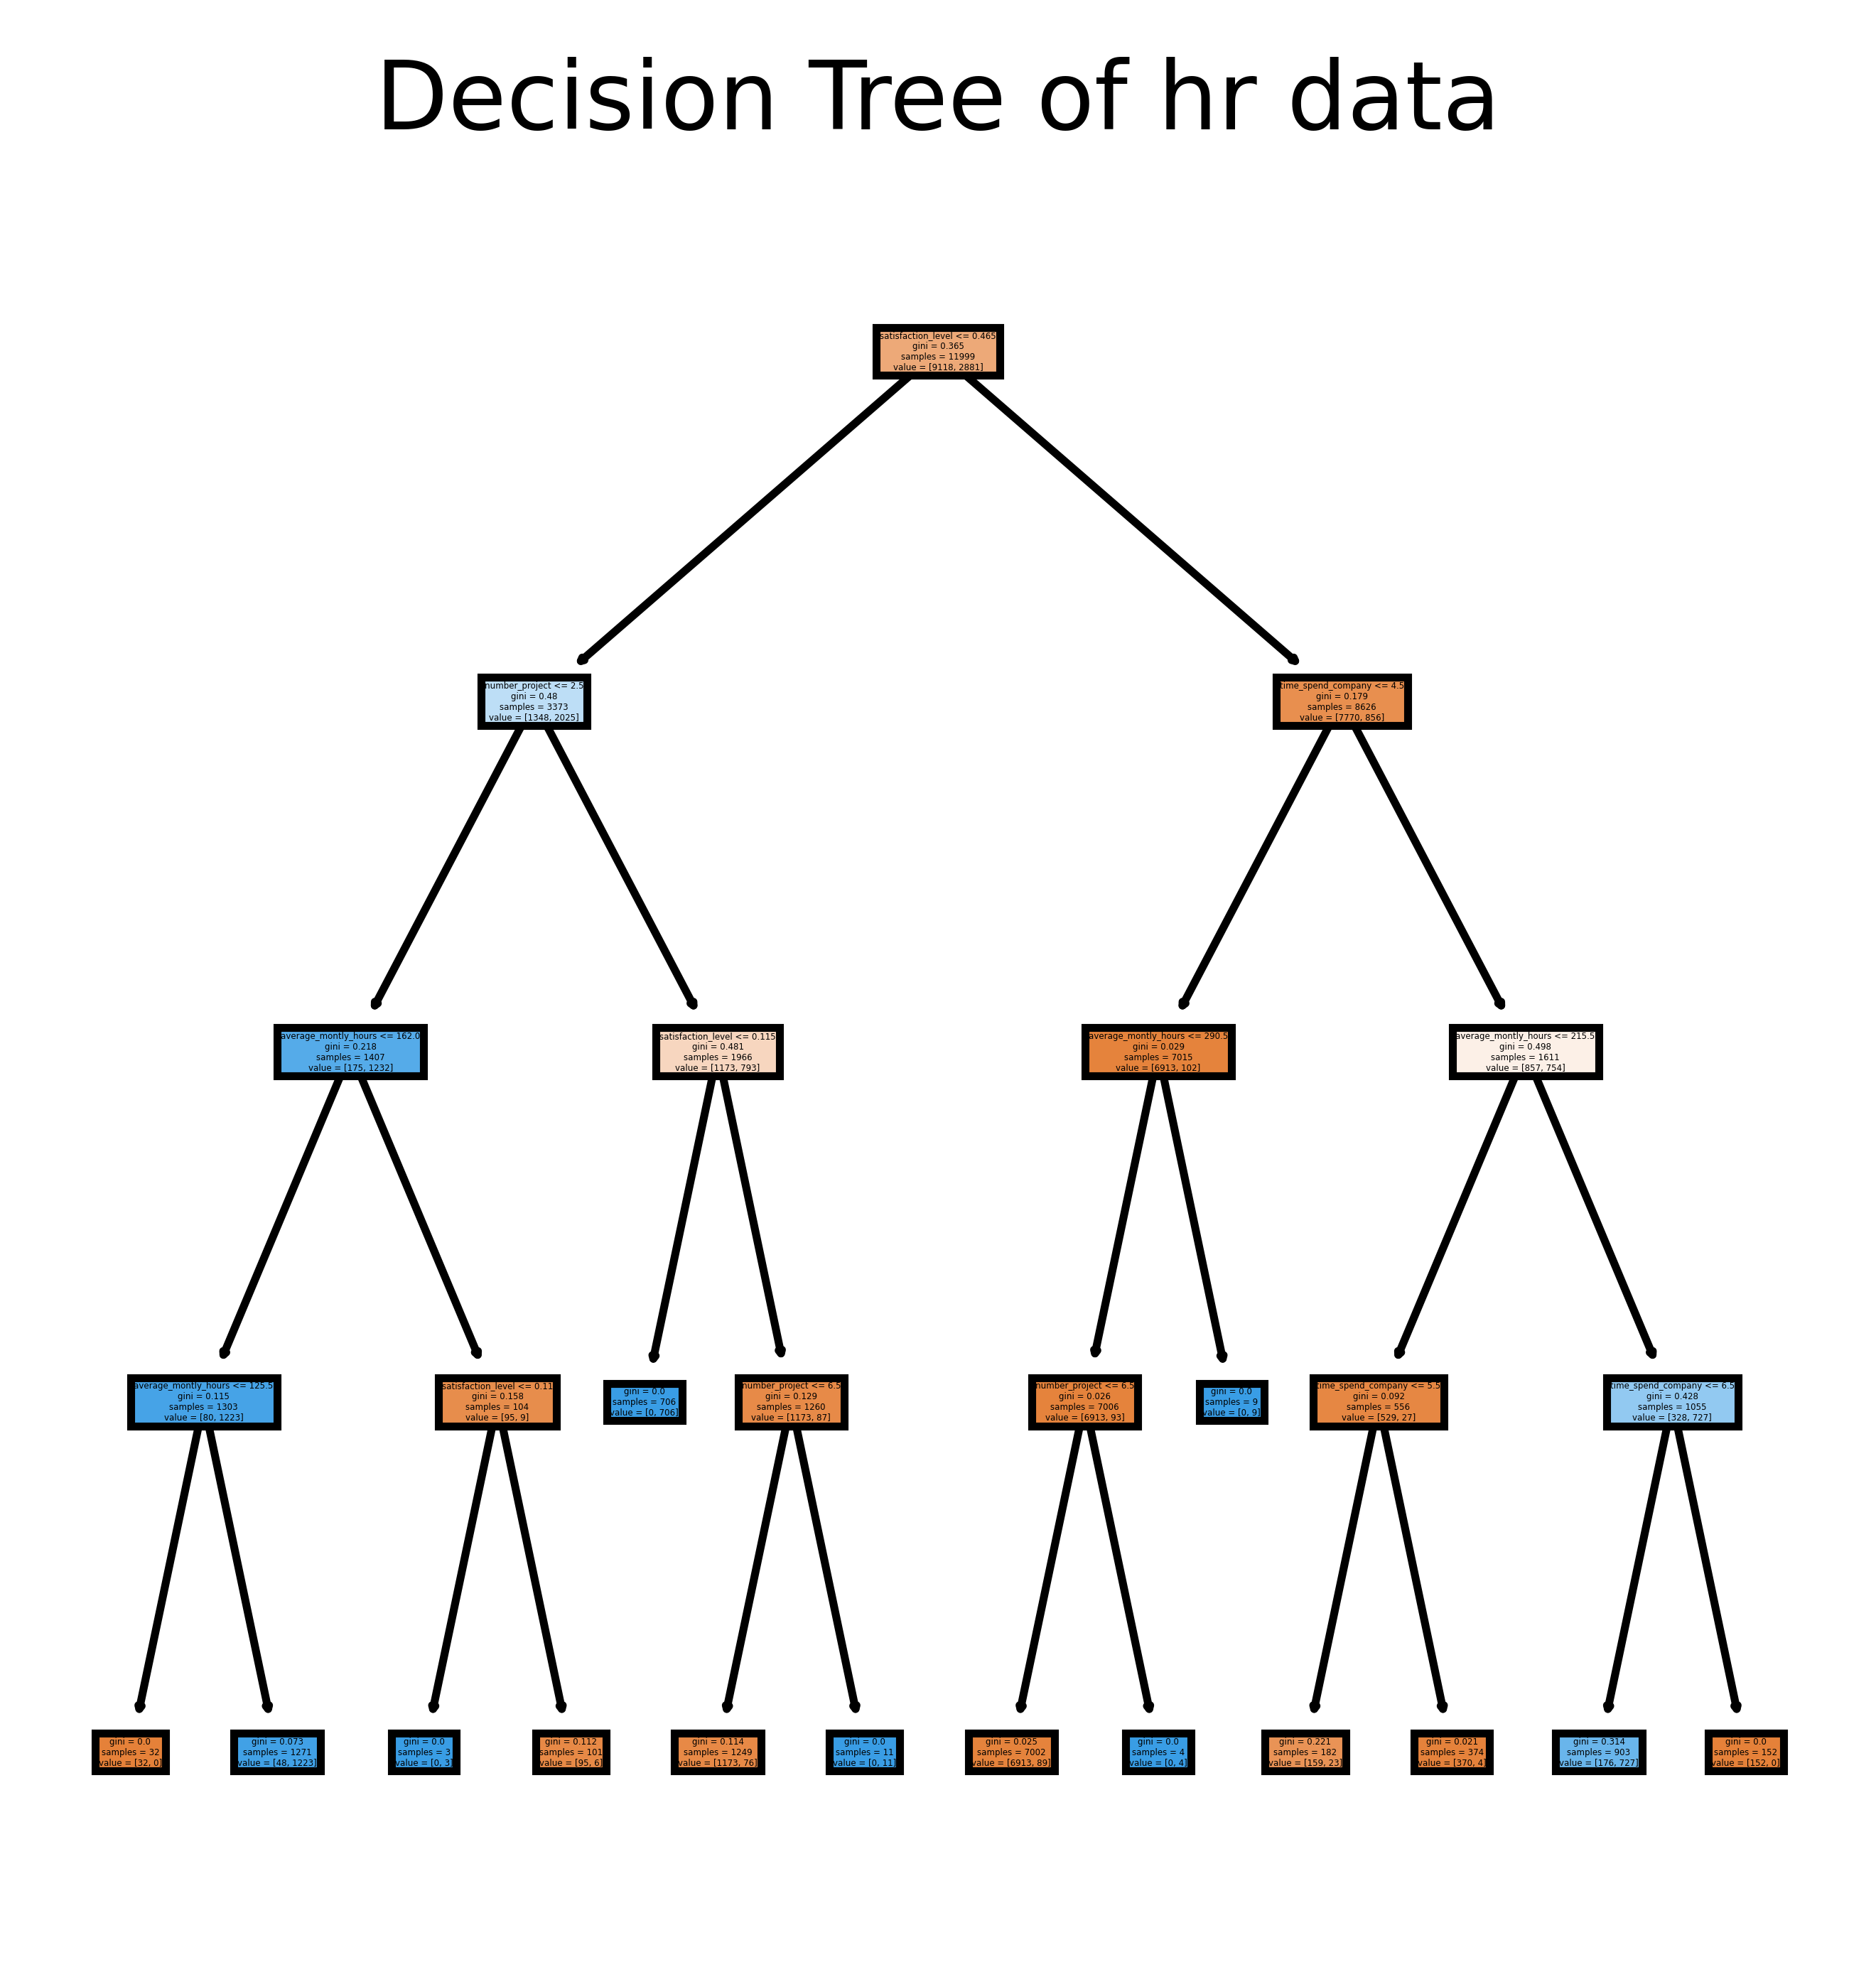

In [20]:
#from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
# Setting dpi = 300 to make image clearer than default
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(clf,feature_names = features, filled = True,);
plt.title("Decision Tree of hr data")

## AUC ROC curve for Naive bayes and Decision Tree

In [21]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_auc_score,roc_curve

In [22]:
ns_probs = [0 for i in range(len(ytest))]

In [23]:
lr_probs1 = classifier.predict_proba(xtest)
lr_probs2=classifier2.predict_proba(xtest)

No Skill: ROC AUC=0.500
Naive bayes : ROC AUC=0.858
Decision : ROC AUC=0.970


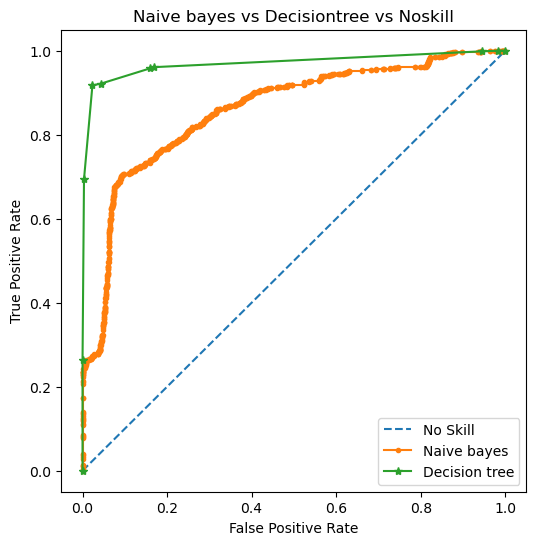

In [24]:
lr_probs1 = lr_probs1[:,1]
lr_probs2=lr_probs2[:,1]
ns_auc = roc_auc_score(ytest, ns_probs)
lr_auc1 = roc_auc_score(ytest, lr_probs1)
lr_auc2 = roc_auc_score(ytest, lr_probs2)
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Naive bayes : ROC AUC=%.3f' % (lr_auc1))
print('Decision : ROC AUC=%.3f' % (lr_auc2))
ns_fpr, ns_tpr, _ = roc_curve(ytest, ns_probs)
lr_fpr1, lr_tpr1, _1 = roc_curve(ytest, lr_probs1)
lr_fpr2, lr_tpr2, _2 = roc_curve(ytest, lr_probs2)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr1, lr_tpr1, marker='.', label='Naive bayes')
plt.plot(lr_fpr2, lr_tpr2, marker='*', label='Decision tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(" Naive bayes vs Decision tree vs No skill ")
plt.gcf().set_size_inches(6, 6)
plt.legend()
plt.show()

## Conclusion :
the Decision Tree model has the highest ROC AUC score of 0.970, followed by the Naive Bayes model with a ROC AUC score of 0.858 and the No Skill model with a ROC AUC score of 0.500. The higher ROC AUC score for the Decision Tree model indicates that it is performing better than both the Naive Bayes and No Skill models in making predictions between positive and negative classes.